In [ ]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/AIM/'
sys.path.append(gdrive_path)

# from google.colab import drive
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Mount your Google Drive
# drive.mount('/content/gdrive')

# # Set the path to your image file on the shared drive
# image_path = '/content/gdrive/MyDrive/ha-image/original_image_full.jpg'

# img = mpimg.imread(image_path)

# plt.imshow(img)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import aim_overlayer

In [ ]:
RAW_SOURCE = False

if RAW_SOURCE:
    image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
    pred_raw_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_raw_bbox.pkl'
    pred_sort_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_sort_dist_bbox.pkl'

    overlay_image_path_raw = '/content/gdrive/MyDrive/AIM/overlay_image_raw.jpg'
    overlay_image_path_sort = '/content/gdrive/MyDrive/AIM/overlay_image_sort.jpg'

else:
    # Noise reduction (xform3a)
    image_path = '/content/gdrive/MyDrive/AIM/citizen_xform3a.jpg'
    pred_raw_path = '/content/gdrive/MyDrive/AIM/citizen_xform3a_raw_bbox.pkl'
    pred_sort_path = '/content/gdrive/MyDrive/AIM/citizen_xform3a_sort_dist_bbox.pkl'

    overlay_image_path_raw = '/content/gdrive/MyDrive/AIM/overlay_image_raw_xform3a.jpg'
    overlay_image_path_sort = '/content/gdrive/MyDrive/AIM/overlay_image_sort_xform3a.jpg'


font_path = '/content/gdrive/MyDrive/AIM/OpenSans-Regular.ttf'


In [ ]:
%%capture
# overlay raw preds
preds_path = pred_raw_path
overlay_image_path = overlay_image_path_raw

# overlay_preds(preds_path, overlay_image_path, raw_preds=True, bbox_color=(0, 0, 255), text_color=(0, 255, 0));
aim_overlayer.overlay_preds(image_path, preds_path, overlay_image_path, font_path, raw_preds=True, bbox_color=(0, 0, 255), text_color=(0, 255, 0))


In [ ]:
from google.colab import files
files.download(overlay_image_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       word     CENTER_X     CENTER_Y  DIST_ORIGEN       DIST_Y         UL_X  \
0    united   890.534058   262.361115   928.377197   262.361115   628.149719   
1    states  1474.218750   268.945312  1498.550171   268.945312  1207.265625   
2        of  1872.656250   272.929688  1892.440796   272.929688  1788.984375   
3  americas  2340.723145   270.657379  2356.319336   270.657379  2019.114136   
4     state   691.289062  1360.664062  1526.200317  1360.664062   549.843750   

          UL_Y         LR_X         LR_Y  
0   214.347778  1152.918457   310.374451  
1   219.140625  1741.171875   318.750000  
2   223.125000  1956.328125   322.734375  
3   224.870667  2662.332031   316.444092  
4  1326.796875   832.734375  1394.531250  
Remaining list of words:
['united', 'states', 'americas', 'state', 'iowa', 'sss', 'scott', 'cunty', 'ioenteubereds', 'that', 'term', 'the', 'district', 'court', 'holden', 'and', 'for', 'said', 'county', 'the', 'city', 'davenport', 'theeln', 'the', 'day', 'oncme

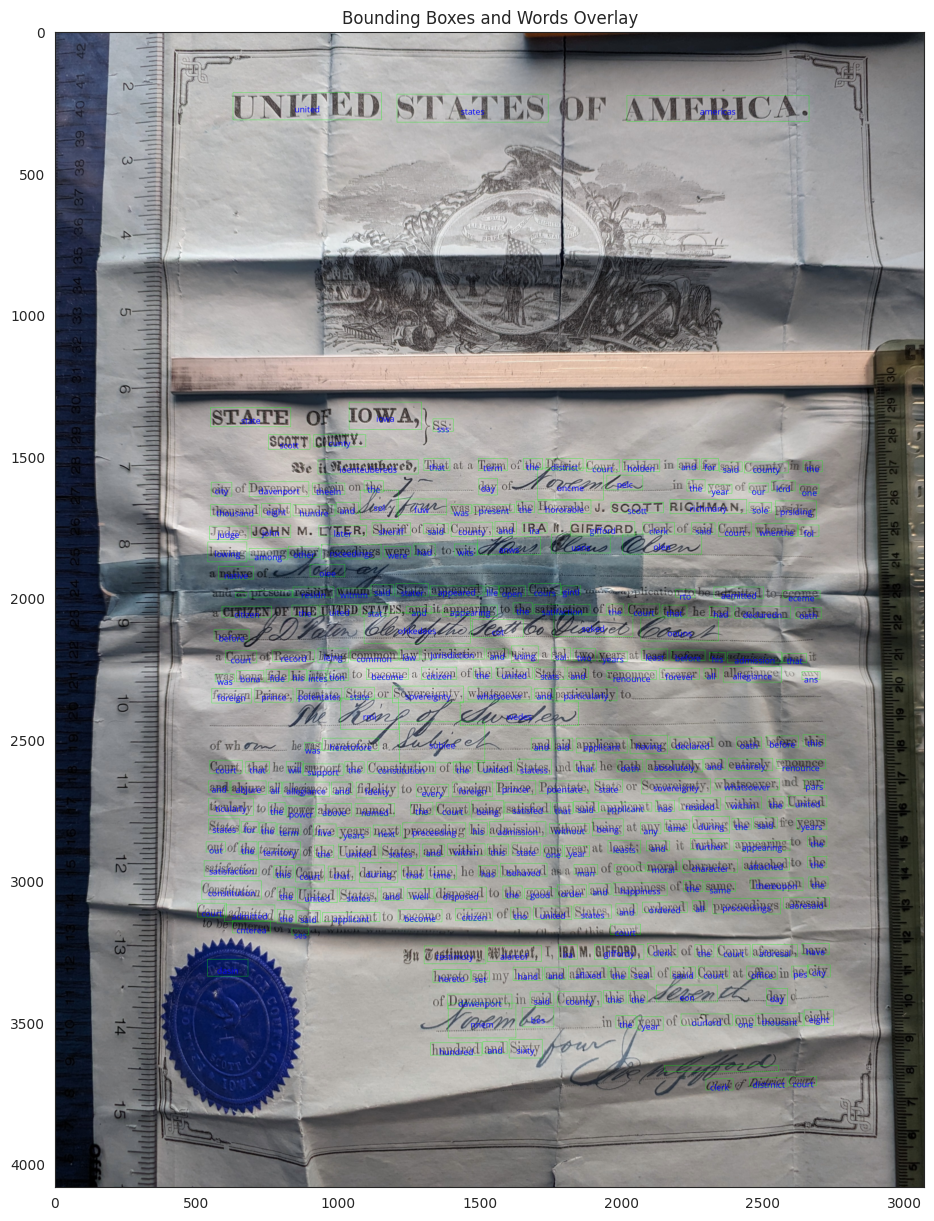

Count of bounding box/word overlays: 329


In [ ]:
#%%capture
# overlay sort preds
preds_path = pred_sort_path
overlay_image_path = overlay_image_path_sort

#overlay_preds(preds_path, overlay_image_path, raw_preds=False, bbox_color=(0, 0, 255), text_color=(0, 255, 0))
aim_overlayer.overlay_preds(image_path, preds_path, overlay_image_path, font_path, raw_preds=False, bbox_color=(0, 0, 255), text_color=(0, 255, 0))

In [ ]:
from google.colab import files
files.download(overlay_image_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Bounding Box Distribution**

Mean Height: 0.81
Standard Deviation of Height: 6.79
Mean Width: 127.63
Standard Deviation of Width: 71.74


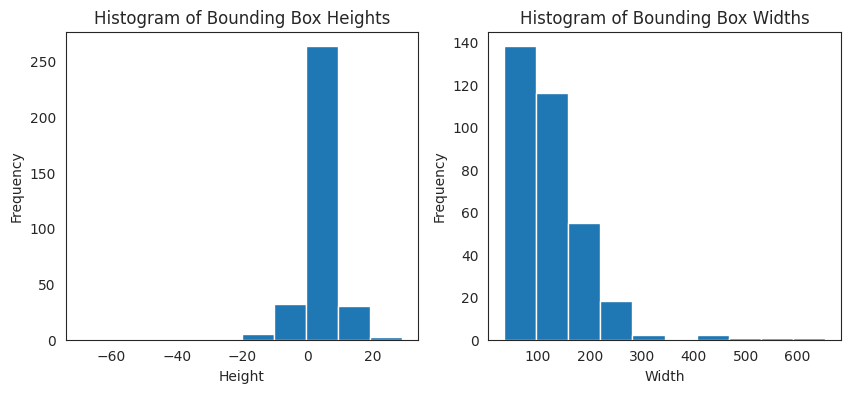

In [ ]:
# model A
# Collect heights and widths
heights = []
widths = []
for idx, row in preds_df.iterrows():
    # Extract the bounding box coordinates and word
    lr_y, ul_y, lr_x,  ul_x, word = row['LL_Y'], row['UL_Y'], row['LR_X'], row['UL_X'], row['word']

    heights.append(lr_y - ul_y)
    widths.append(lr_x - ul_x)

# Calculate mean, standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

print(f"Mean Height: {mean_height:.2f}")
print(f"Standard Deviation of Height: {std_height:.2f}")
print(f"Mean Width: {mean_width:.2f}")
print(f"Standard Deviation of Width: {std_width:.2f}")

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(heights)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Heights')

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Widths')

plt.show()